In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
N = 101
dx = 0.01
dt = 0.005


In [3]:
def u_0(x):
    return m.exp(-100*(x-0.5)**2)

def next_u(str):
    return str[0] + dt * str[1] + 0.5 * str[2] * dt**2

def next_a(str_x0,str_x1,str_x2):
    return (str_x2[0] + str_x0[0] - 2 * str_x1[0]) / (dx**2)

def next_v(str_t0,str_t1):
    return str_t0[1] + 0.5 * dt * (str_t1[2] + str_t0[2])

def next_a_tl(str_x0,str_x1,str_x2,b):
    return (str_x1[2]) - 2 * b * str_x1[1]

def next_v_tl(str_t0,str_t1, b):
    return (str_t0[1] + 0.5 * dt * (str_t1[2]+str_t0[3])) / (1 + b * dt)

In [4]:
'''
Część wyliczająca przypadek sztywnych warunków brzegowych
'''

range_x = np.arange(0,1.01,dx)
range_t = np.arange(0,5.005,dt)
time = len(range_t)
struna = np.zeros([time,N,3])            #tablica o wymiarach N x 3 gdzie na miejscu 0 osadzono x

for i in range(1,N-1):
    struna[0][i][0] = u_0(range_x[i])

struna[0][N-1][0] = 0
struna[0][0][0] = 0



for t in range(1,time):
    for i in range(1,N-1):
        struna[t][i][0] = next_u(struna[t-1][i])
    for i in range(1,N-1):
        struna[t][i][2] = next_a(struna[t][i-1], struna[t][i], struna[t][i+1])
    for i in range(1,N-1):
        struna[t][i][1] = next_v(struna[t-1][i], struna[t][i])

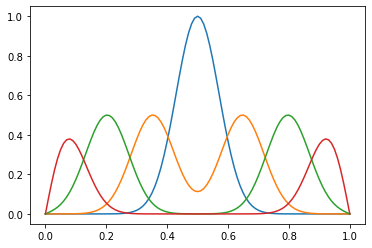

In [5]:
plt.plot(range_x,struna.T[0].T[0],
        range_x,struna.T[0].T[30],
        range_x,struna.T[0].T[60],
        range_x,struna.T[0].T[90])

In [6]:
'''
Część wyliczająca przypadek luźnych warunków brzegowych
'''

struna_sz = np.zeros([time,N,3])            #tablica o wymiarach N x 3 gdzie na miejscu 0 osadzono x

for i in range(1,N-1):
    struna_sz[0][i][0] = u_0(range_x[i])

struna_sz[0][N-1][0] = 0
struna_sz[0][0][0] = 0


for t in range(1,time):
    struna_sz[t][0][1] = 0
    struna_sz[t][N-1][1] = 0

    for i in range(1,N-1):
        struna_sz[t][i][0] = next_u(struna_sz[t-1][i])

    struna_sz[t][0][0]=struna_sz[t][1][0]
    struna_sz[t][N-1][0]=struna_sz[t][N-2][0]

    for i in range(1,N-1):
        struna_sz[t][i][2] = next_a(struna_sz[t][i-1], struna_sz[t][i], struna_sz[t][i+1])

    for i in range(1,N-1):
        struna_sz[t][i][1] = next_v(struna_sz[t-1][i], struna_sz[t][i])

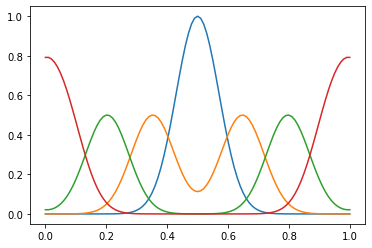

In [7]:
plt.plot(range_x,struna_sz.T[0].T[0],
        range_x,struna_sz.T[0].T[30],
        range_x,struna_sz.T[0].T[60],
        range_x,struna_sz.T[0].T[90])

In [8]:
'''
Część wyliczająca przypadek sztywnych warunków brzegowych z tłumieniem
'''
def strunaTlumiona(B):
    str = np.zeros([time,N,4])            #tablica o wymiarach N x 4 gdzie na miejscu 0 osadzono x

    for i in range(1,N-1):
        str[0][i][0] = u_0(range_x[i])

    str[0][N-1][0] = 0
    str[0][0][0] = 0

    for t in range(1,time):
        for i in range(1,N-1):
            str[t][i][0] = next_u(str[t-1][i])
        for i in range(1,N-1):
            str[t][i][2] = next_a(str[t][i-1], str[t][i], str[t][i+1])
            str[t][i][3] = next_a_tl(str[t][i-1], str[t][i], str[t][i+1], B)
        for i in range(1,N-1):
            str[t][i][1] = next_v_tl(str[t-1][i], str[t][i], B)
    return str

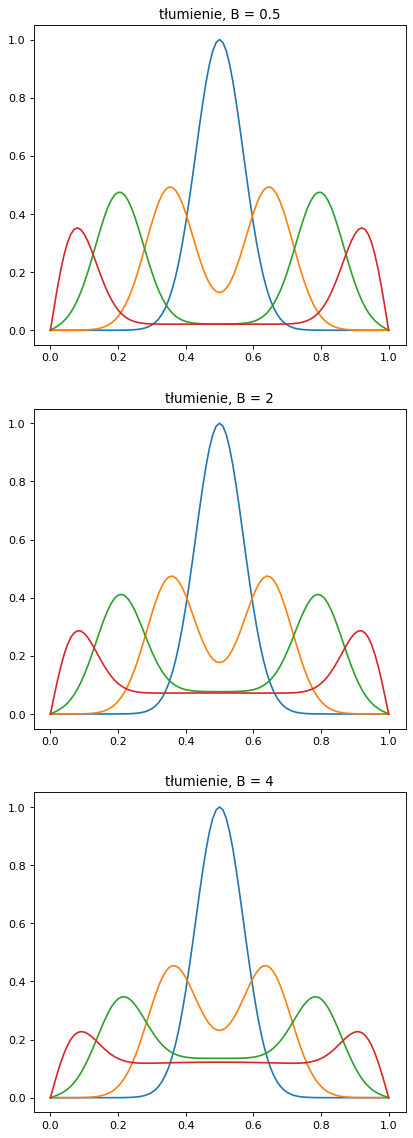

In [9]:
struna_tlumiona_05 = strunaTlumiona(0.5)
struna_tlumiona_2 = strunaTlumiona(2)
struna_tlumiona_4 = strunaTlumiona(4)

fig = plt.figure(figsize=(6, 18), dpi=80)

plt.subplot(3,1,1)
plt.title('tłumienie, B = 0.5')
plt.plot(range_x,struna_tlumiona_05.T[0].T[0],
        range_x,struna_tlumiona_05.T[0].T[30],
        range_x,struna_tlumiona_05.T[0].T[60],
        range_x,struna_tlumiona_05.T[0].T[90])

plt.subplot(3,1,2)
plt.title('tłumienie, B = 2')
plt.plot(range_x,struna_tlumiona_2.T[0].T[0],
        range_x,struna_tlumiona_2.T[0].T[30],
        range_x,struna_tlumiona_2.T[0].T[60],
        range_x,struna_tlumiona_2.T[0].T[90])

plt.subplot(3,1,3)
plt.title('tłumienie, B = 4')
plt.plot(range_x,struna_tlumiona_4.T[0].T[0],
        range_x,struna_tlumiona_4.T[0].T[30],
        range_x,struna_tlumiona_4.T[0].T[60],
        range_x,struna_tlumiona_4.T[0].T[90])

In [10]:
'''
Część wyliczająca przypadek sztywnych warunków brzegowych z tłumieniem i działającą siłą
'''

def next_v_tl_sil(str_t0,str_t1, b):
    return ( str_t0[1] + 0.5 * dt * (str_t1[2] + str_t0[3] + str_t1[4] + str_t0[4]) ) / (1 + b * dt)

def strunaTlumionaSila(B,x0):

    range_x = np.arange(0,1.01,dx)
    range_t = np.arange(0,10.005,dt)
    time = len(range_t)
    str = np.zeros([time,N,5])            #tablica o wymiarach N x 5 gdzie na miejscu 0 osadzono x

    for i in range(1,N-1):
        str[0][i][0] = u_0(range_x[i])

    str[0][N-1][0] = 0
    str[0][0][0] = 0

    for t in range(1,time):
        for i in range(1,N-1):
            str[t][i][0] = next_u(str[t-1][i])
        for i in range(1,N-1):
            str[t][i][2] = next_a(str[t][i-1], str[t][i], str[t][i+1])
            str[t][i][3] = next_a_tl(str[t][i-1], str[t][i], str[t][i+1], B)
            if i == x0:
                str[t][i][4] = m.cos(m.pi/2 * t)
        for i in range(1,N-1):
            str[t][i][1] = next_v_tl_sil(str[t-1][i], str[t][i], B)
    return str

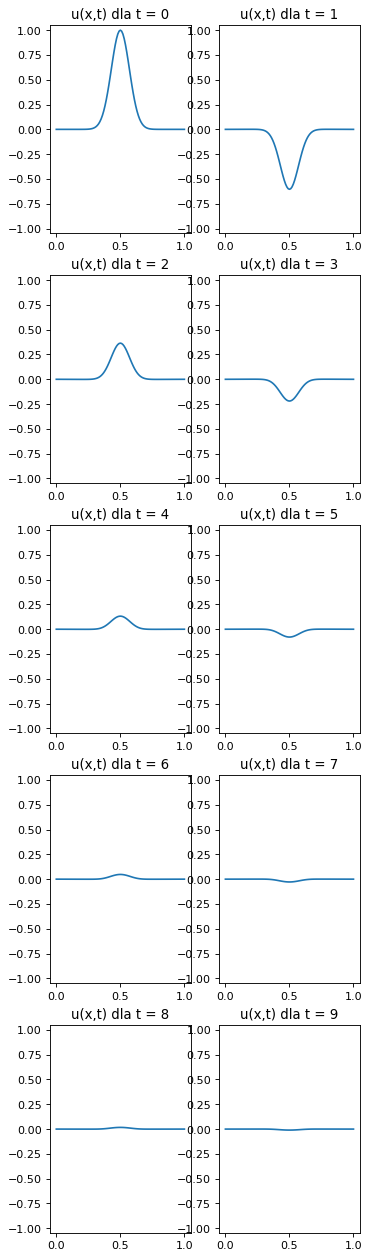

In [11]:
struna_tlumiona_1 = strunaTlumionaSila(1, 0.5)

fig = plt.figure(figsize=(5, 20), dpi=80)

for i in range(1,11):
    temp = i-1
    plt.subplot(5,2,i)
    plt.ylim(-1.05,1.05)
    plt.title(f'u(x,t) dla t = {temp}')
    plt.plot(range_x, struna_tlumiona_1.T[0].T[(temp) * 200])

In [32]:
import os
import imageio

In [37]:
len(struna_tlumiona_1.T[0].T)

2002

In [ ]:
for i in range(100):
    plt.figure()
    plt.plot(struna_tlumiona_1.T[0].T[i*20])  
    plt.savefig(f'gif/{i}.png')


In [44]:
gifs = []
for i in range(100):
    gifs.append(f'gif/{i}.png')

In [45]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in gifs:
        image = imageio.imread(filename)
        writer.append_data(image)   

In [12]:
# fig = plt.figure(figsize=(5, 20), dpi=80)

# for i in range(1,11):
#     temp = ((i-1) * 50 + 1300) * 0.005
#     plt.subplot(5,2,i)
#     plt.ylim(-0.1,0.1)
#     plt.title(f'u(x,t) dla t = {temp}')
#     plt.plot(range_x, struna_tlumiona_1.T[0].T[(i-1) * 50 + 1300])

In [13]:
'''
Część wyliczająca przypadek sztywnych warunków brzegowych z tłumieniem i działającą siłą i zmienną częstotliwością
'''

def next_v_tl_sil(str_t0,str_t1, b):
    return ( str_t0[1] + 0.5 * dt * (str_t1[2] + str_t0[3] + str_t1[4] + str_t0[4]) ) / (1 + b * dt)

def strunaTlumionaSilaEnergia(B,x0,w):

    range_x = np.arange(0,1.01,dx)
    range_t = np.arange(0,20.005,dt)
    time = len(range_t)
    str = np.zeros([time,N,5])            #tablica o wymiarach N x 5 gdzie na miejscu 0 osadzono x

    for i in range(1,N-1):
        str[0][i][0] = u_0(range_x[i])

    str[0][N-1][0] = 0
    str[0][0][0] = 0

    for t in range(1,time):
        for i in range(1,N-1):
            str[t][i][0] = next_u(str[t-1][i])
        for i in range(1,N-1):
            str[t][i][2] = next_a(str[t][i-1], str[t][i], str[t][i+1])
            str[t][i][3] = next_a_tl(str[t][i-1], str[t][i], str[t][i+1], B)
            if i == x0:
                str[t][i][4] = m.cos(w * t)
        for i in range(1,N-1):
            str[t][i][1] = next_v_tl_sil(str[t-1][i], str[t][i], B)
    return str

In [14]:
ran_x = np.arange(0,1.01,dx)
ran_t = np.arange(0,20.005,dt)
time = len(ran_t)
E_sr = np.zeros(20)

struna_tlumiona_en = np.zeros([20,time,N,5]) 

for i in range(20):
    struna_tlumiona_en[i] = strunaTlumionaSilaEnergia(1, 0.5, 0.5 * m.pi * (i+1))

    En = np.zeros([time,2])
    ux_01 = np.zeros(time)
    ux = np.zeros([time,N])

    for t in range(time):
        for x in range(len(ran_x)-1):
            ux[t][x] = (struna_tlumiona_en[i][t][x+1][0] - struna_tlumiona_en[i][t][x][0])/dx
    for t in range(time):
        En[t] = 0.5 * dx * np.sum(struna_tlumiona_en[i].T[1].T[t]**2) + 0.5 * dx * np.sum(ux[t]**2)
    E_sr[i] = (1/4) * dx * np.sum(En)


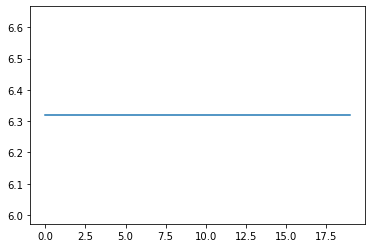

In [15]:
plt.plot(E_sr)